# Music Genre Classification

**Aidan O'Keefe**

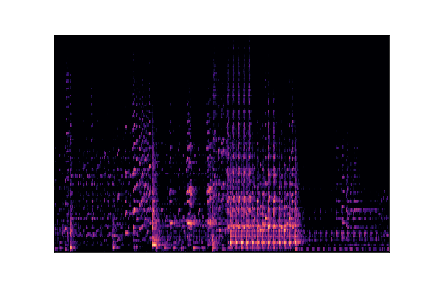
*Spectrogram of jazz00000.wav audio file*

## Overview

OVERVIEW HERE


## Business Understanding

A Folk Music researcher (musicologist) is recording cultural music in the field and wants to know what genre to categorize his recordings. He think that maybe by finding what modern genre a recording is classified as will help explain which modern genres are influenced by traditional folk music. (Jazz being influenced by African rhythms and Bluegrass from traditional Irish music). 
<br>
<br>
In order to help the musicologist, I am building a model which can classify a recording into a genre based on the extracted data from an audio file.

## Data Understanding

I chose to use ["GTZAN Dataset - Music Genre Classification" from Kaggle](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification) which is a dataset of 1000 audio tracks of a 30-second duration. The 1000 rows of data are evenly divided into 10 genres with 100 tracks each. All the original audio files are in 22050Hz Mono 16-bit files in .wav format.

On Kaggle, we fortunately had a csv file available with features already extracted from each audio file. In "features_30_sec.csv" which I am using, each row represents a 30-second long song recording. The columns contain a mean and variance computed over multiple features that can be extracted from an audio file using the Librosa python package.


#### Decription of each column feature:

`filename`: the name of each audio .wav file from where the rest of the data was extracted.

`length`: length of each recording minus silence at beginning or end of the audio track.

`chroma_stft_mean`: Mean of computed chromagrams from a waveform or power spectrogram.

`chroma_stft_var`: Variance of computed chromagrams from a waveform or power spectrogram.

`rms_mean`: Mean of the computed root-mean-square (RMS) value for each frame from the audio samples.

`rms_var`: Variance of the computed root-mean-square (RMS) value for each frame from the audio samples.

`spectral_centroid_mean`: Computed the spectral centroid (i.e. where a sound's ”center of mass” is located). Calculated as the weighted mean of the sound's frequencies.

`spectral_centroid_variance`: Variance of the computed the spectral centroid (i.e. where a sound's ”center of mass” is located).

`spectral_bandwidth_mean`: Mean of the computed p'th-order spectral bandwidth.

`spectral_bandwidth_var`: Variance of the computed p'th-order spectral bandwidth.

`rolloff_mean`: Mean of the computed roll-off frequency aka spectral_rolloff

`rolloff_variance`: Variance of the computed roll-off frequency aka spectral_rolloff

`zero_crossing_rate_mean`: Mean of the computed the zero-crossing rate of an audio time series.

`zero_crossing_rate_variance`: Variance of the computed the zero-crossing rate of an audio time series.

`harmony_mean`: Mean of the extracted the harmonic components.

`harmony_var`: Variance of the extracted the harmonic components.

`perceptr_mean`: Mean of the extracted the percussive components.

`perceptr_var`: Variance of the extracted the percussive components.

`tempo`: Estimated tempo (beats per minute).

`mfccN_mean`: Mean of the calculated Mel-frequency cepstral coefficients (MFCCs) for frame N of the audio file.

`mfccN_var`: Variance of the calculated MFCCs for frame N of the audio file.

`label`: The assigned genre label for each audio file that will be used as our target variable. Options are metal, reggae, rock, disco, jazz, classical, hiphop, country, blues, and pop.

### Importing The Data

In [1]:
#Import standard libraries
import numpy as np
import pandas as pd

#View all columns in our dataframes
pd.options.display.max_columns = None
pd.options.display.width = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data csv
music_df = \
pd.read_csv("/Users/Aidan/Documents/Flatiron/Phase_3/Phase_3_project/Music_Genre_Classification/data/features_30_sec.csv") 

In [3]:
#Preview the first five records
music_df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              2002.449060            85882.761315   3805.839606   
1              2039.036516           213843.755497   3550.522098   
2              1747.702312            76254.192257   3042.260232   
3              1596.412872           166441.494769   2184.745799   
4              1748.172116            88445.209036   3579.757627   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  9.015054e+05                 0.083045                0.000767   
1  2.977893e+06                 0.056040                0.001448   
2  7.840345e+05                 0.076291                0.001007   
3  1.493194e+06                 0.033309                0.000423   
4  1.572978e+06                 0.101461                0.001954   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0 -4.529724e-05     0.008172       0.000008      0.005698  123.046875   
1  1.395807e-04     0.005099      -0.000178      0.003063   67.999589   
2  2.105576e-06     0.016342      -0.000019      0.007458  161.499023   
3  4.583644e-07     0.019054      -0.000014      0.002712   63.024009   
4 -1.756129e-05     0.004814      -0.000010      0.003094  135.999178   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -113.570648  2564.207520  121.571793  295.913818  -19.168142  235.574432   
1 -207.501694  7764.555176  123.991264  560.259949    8.955127  572.810913   
2  -90.722595  3319.044922  140.446304  508.765045  -29.093889  411.781219   
3 -199.544205  5507.517090  150.090897  456.505402    5.662678  257.161163   
4 -160.337708  5195.291992  126.219635  853.784729  -35.587811  333.792938   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   42.366421  151.106873   -6.364664  167.934799   18.623499   89.180840   
1   35.877647  264.506104    2.907320  279.932922   21.510466  156.477097   
2   31.684334  144.090317  -13.984504  155.493759   25.764742   74.548401   
3   26.859079  158.267303    1.771399  268.034393   14.234031  126.794128   
4   22.148071  193.456100  -32.478600  336.276825   10.852294  134.831573   

   mfcc7_mean   mfcc7_var  mfcc8_mean   mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -13.704891   67.660492   15.343150   68.932579  -12.274110   82.204201   
1   -8.560436  200.849182   23.370686  142.555954  -10.099661  166.108521   
2  -13.664875  106.981827   11.639934  106.574875  -11.783643   65.447945   
3   -4.832006  155.912079    9.286494   81.273743   -0.759186   92.114090   
4  -23.352329   93.257095    0.498434  124.672127  -11.793437  130.073349   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.976572   63.386311    -8.326573   61.773094     8.803792   51.244125   
1    11.900497  104.358612    -5.555639  105.173630     5.376327   96.197212   
2     9.718760   67.908859   -13.133803   57.781425     5.791199   64.480209   
3     8.137607   71.314079    -3.200653  110.236687     6.079319   48.251999   
4     1.207256   99.675575   -13.088418   80.254066    -2.813867   86.430626   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  

### Exploring The Data

In [4]:
#Look at our datatypes and for any missing values
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [5]:
#Check our dataframe for duplicates
music_df.duplicated().sum()

0

It looks like we have no missing values and all of our features are numerical except for file name and label. We also do not have any duplicates.

In [6]:
#Let's see a summary of numerical values for our data
music_df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  1000.000000             1000.000000           1.000000e+03   
mean      0.003051             2201.780898           4.696916e+05   
std       0.003634              715.960600           4.008995e+05   
min       0.000004              570.040355           7.911251e+03   
25%       0.000942             1627.697311           1.843505e+05   
50%       0.001816             2209.263090           3.384862e+05   
75%       0.003577             2691.294667           6.121479e+05   
max       0.027679             4435.243901           3.036843e+06   

       spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
count              1000.000000             1000.000000   1000.000000   
mean               2242.541070           137079.155165   4571.549304   
std                 526.316473            96455.666326   1574.791602   
min                 898.066208            10787.185064    749.140636   
25%                1907.240605            67376.554428   3380.069642   
50%                2221.392843           111977.548036   4658.524473   
75%                2578.469836           182371.576801   5533.810460   
max                3509.646417           694784.811549   8677.672688   

        rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
count  1.000000e+03              1000.000000             1000.000000   
mean   1.844345e+06                 0.103612                0.002986   
std    1.425085e+06                 0.041821                0.003024   
min    1.468612e+04                 0.021697                0.000044   
25%    7.727312e+05                 0.070244                0.001079   
50%    1.476115e+06                 0.099503                0.002022   
75%    2.555262e+06                 0.131944                0.003628   
max    8.660900e+06                 0.274631                0.028718   

       harmony_mean  harmony_var  perceptr_mean  perceptr_var        tempo  \
count  1.000000e+03  1000.000000    1000.000000  1.000000e+03  1000.000000   
mean  -3.659332e-04     0.012540      -0.000395  5.670073e-03   119.505363   
std    1.683946e-03     0.011653       0.001082  6.500325e-03    28.264176   
min   -2.606458e-02     0.000049      -0.007150  8.299008e-07    54.978391   
25%   -1.041584e-04     0.004383      -0.000537  1.292592e-03    99.384014   
50%   -3.176783e-06     0.008768      -0.000036  3.410864e-03   117.453835   
75%    6.643430e-07     0.016947      -0.000004  7.641643e-03   135.999178   
max    1.505448e-02     0.085658       0.005787  4.744598e-02   234.907670   

        mfcc1_mean     mfcc1_var   mfcc2_mean    mfcc2_var   mfcc3_mean  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean   -144.472987   3747.875414    99.554278   706.899539    -8.920291   
std     100.229406   2770.558394    31.330873   439.120256    21.690676   
min    -552.120056    174.571365    -1.461542    93.104752   -89.870193   
25%    -200.763893   1844.488129    76.779915   398.020767   -24.219811   
50%    -120.286385   3135.163696    98.458744   608.351074   -10.707893   
75%     -73.913042   4978.131592   119.954811   884.040359     5.505812   
max      42.039433  28243.437500   193.097397  4025.973389    56.682800   

         mfcc3_var   mfcc4_mean    mfcc4_var   mfcc5_mean    mfcc5

Our data seems to have varying magnitude across rows which indicates that we will need to scale it before modeling.

In [7]:
#Let's look at our `label` column which will be our target varible
music_df.label.value_counts()

hiphop       100
classical    100
metal        100
jazz         100
disco        100
reggae       100
rock         100
blues        100
pop          100
country      100
Name: label, dtype: int64

Everything imported correctly and we have a balanced dataset across our 10 Genres/Classes

### Visualizing the Data

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

%matplotlib inline

In [9]:
music_df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

Let's look at the distributions of our non MFCC varibles.

In [10]:
non_mfcc_cols = ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo']

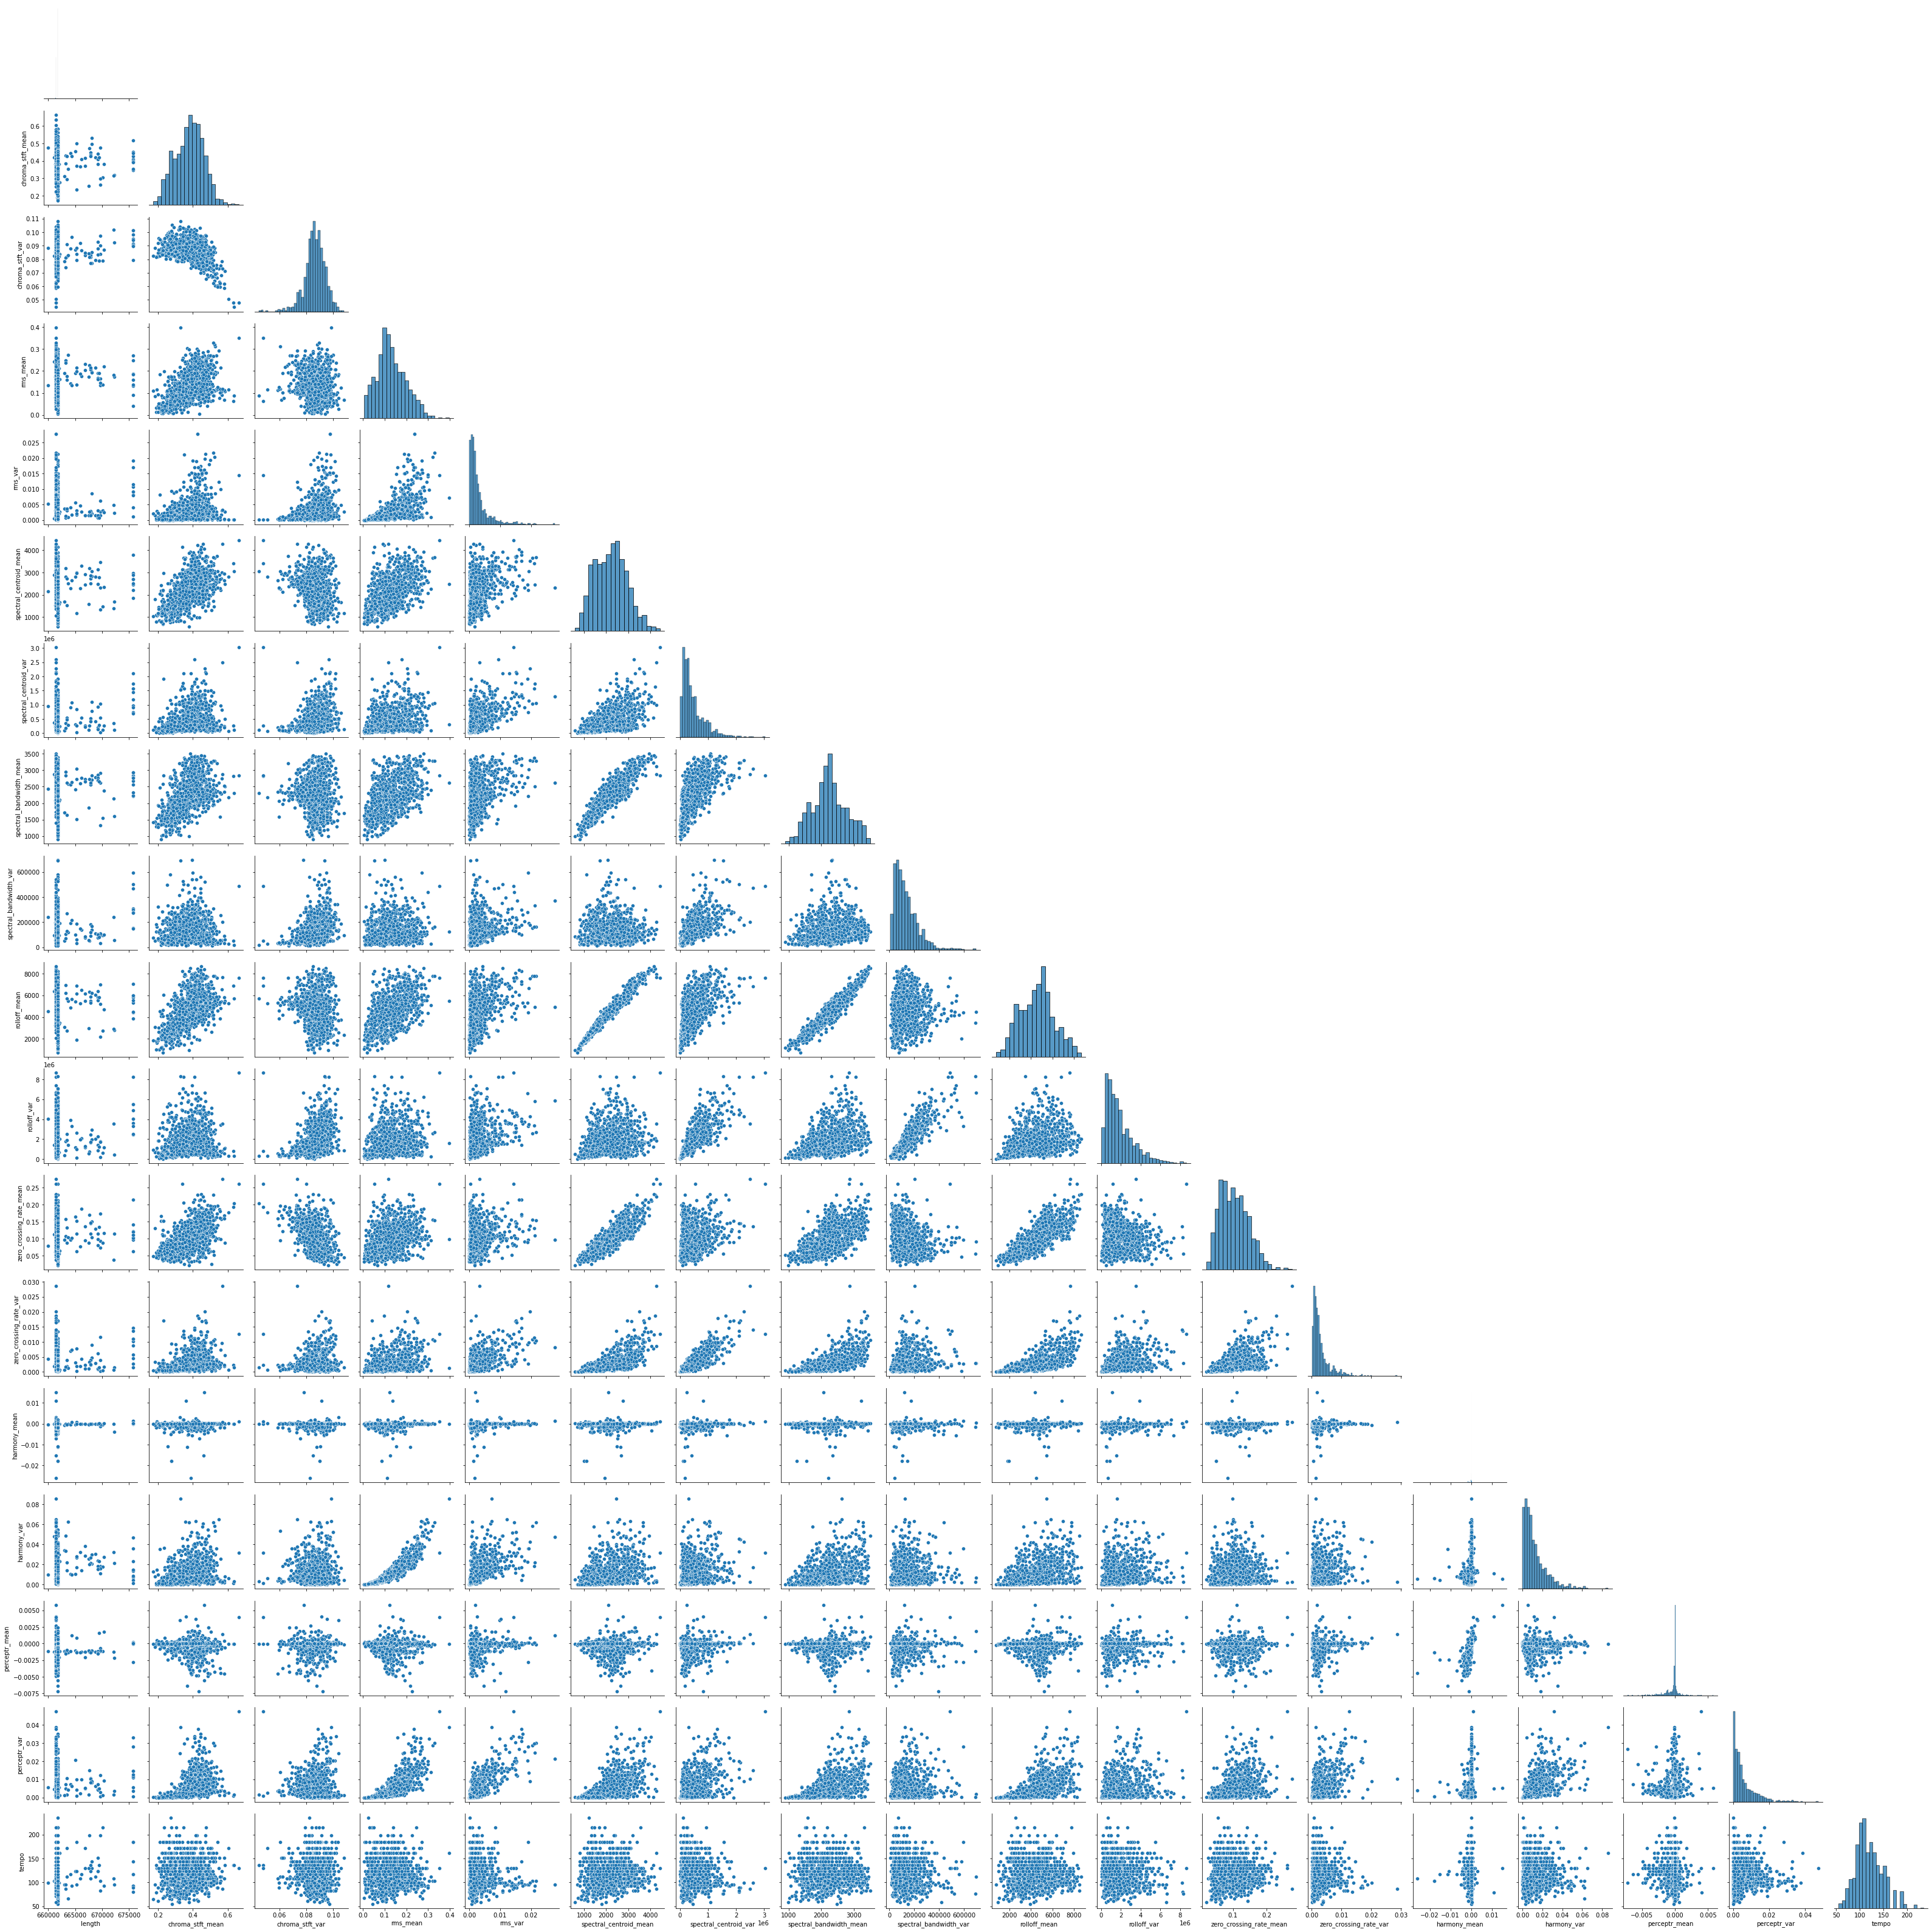

In [11]:
#View Distribution of variables
sns.pairplot(music_df[non_mfcc_cols], corner=True);

It looks like quite a few of our variables have a positive skew and there is definiely some correlation among variables.

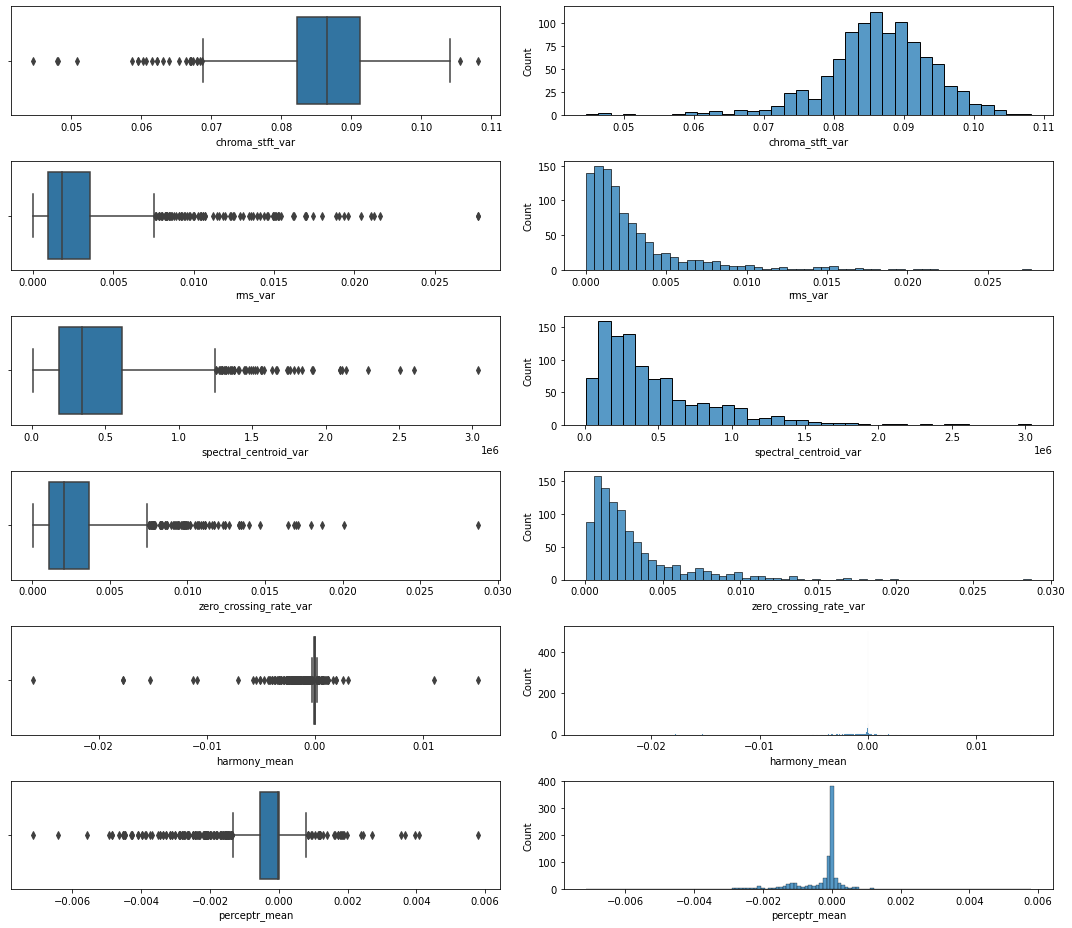

In [12]:
#Let's dig deeper into the variables that looked to have skewed distributions
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= music_df["chroma_stft_var"], ax = ax[0,0])
sns.histplot(music_df['chroma_stft_var'], ax = ax[0,1])

sns.boxplot(x= music_df['rms_var'], ax = ax[1,0])
sns.histplot(music_df['rms_var'], ax = ax[1,1])

sns.boxplot(x= music_df['spectral_centroid_var'], ax = ax[2,0])
sns.histplot(music_df['spectral_centroid_var'], ax = ax[2,1])

sns.boxplot(x= music_df['zero_crossing_rate_var'], ax = ax[3,0])
sns.histplot(music_df['zero_crossing_rate_var'], ax = ax[3,1])

sns.boxplot(x= music_df['harmony_mean'], ax = ax[4,0])
sns.histplot(music_df['harmony_mean'], ax = ax[4,1])

sns.boxplot(x= music_df['perceptr_mean'], ax = ax[5,0])
sns.histplot(music_df['perceptr_mean'], ax = ax[5,1])

plt.tight_layout()

INTERPRETATION OF BOX PLOTS AND DISTRIBUTION PLOTS

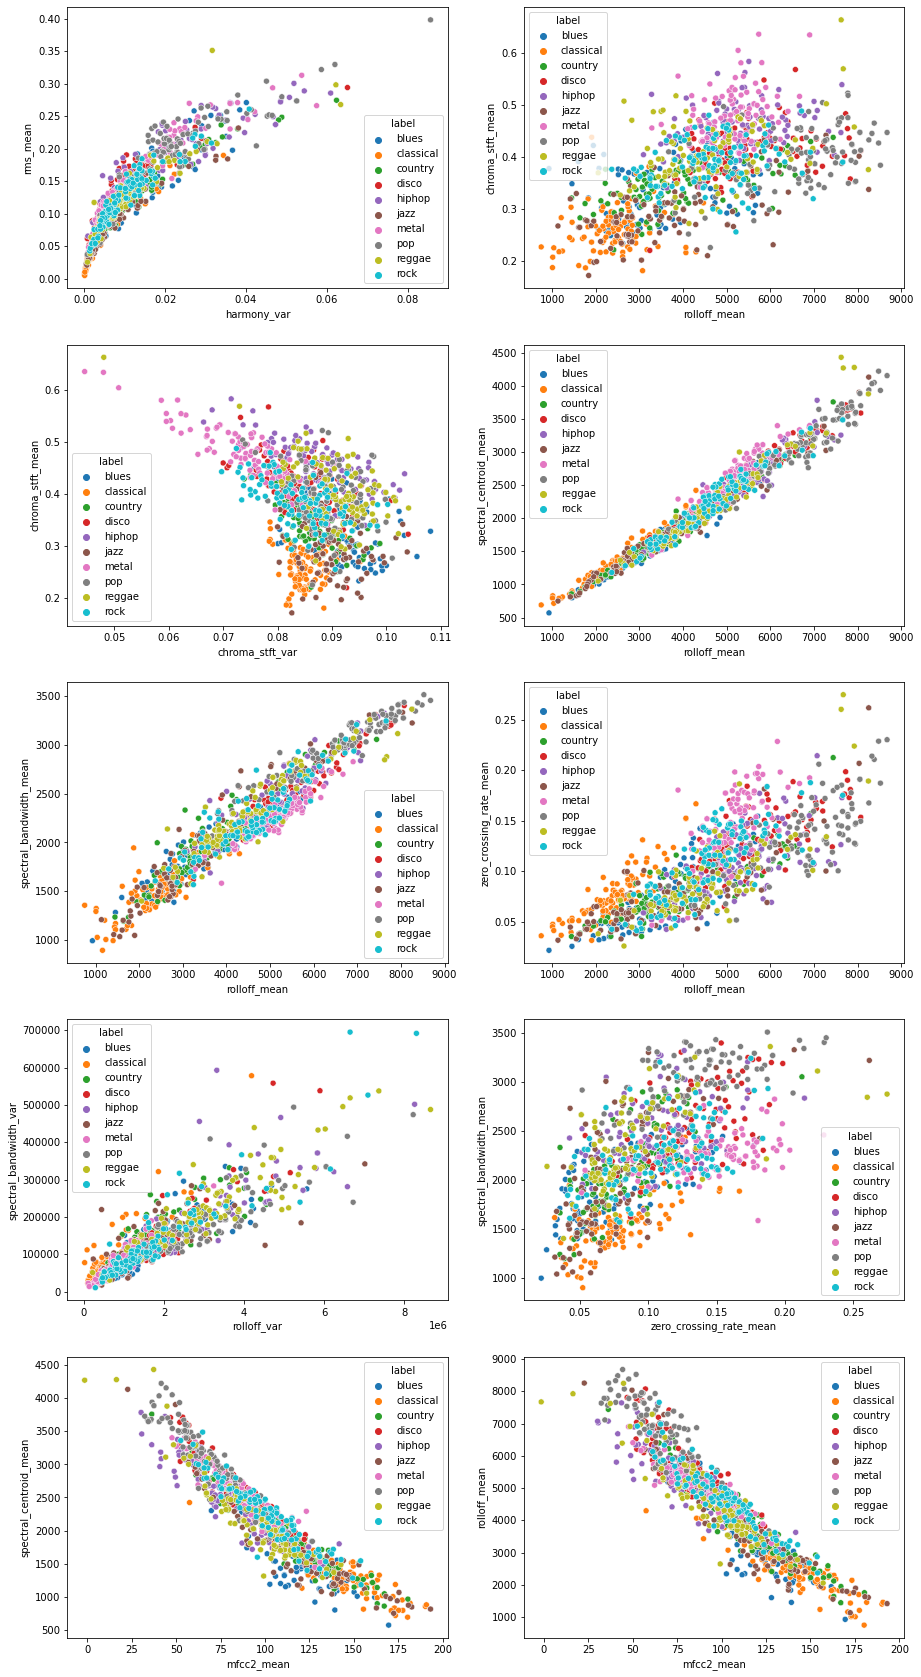

In [13]:
#Let's take a closer look at predictive variables that appear to have strong positive or negative correlation

fig, ax = plt.subplots(5, 2, figsize = (15, 30))

sns.scatterplot(x='harmony_var' , y='rms_mean', data=music_df, hue='label', ax = ax[0,0])

sns.scatterplot(x='rolloff_mean' , y='chroma_stft_mean', data=music_df, hue='label', ax = ax[0,1])

sns.scatterplot(x='chroma_stft_var' , y='chroma_stft_mean', data=music_df, hue='label', ax = ax[1,0])

sns.scatterplot(x='rolloff_mean', y='spectral_centroid_mean', data=music_df, hue='label', ax = ax[1,1])

sns.scatterplot(x='rolloff_mean', y='spectral_bandwidth_mean', data=music_df, hue='label', ax = ax[2,0])

sns.scatterplot(x='rolloff_mean', y='zero_crossing_rate_mean', data=music_df, hue='label', ax = ax[2,1])

sns.scatterplot(x='rolloff_var', y='spectral_bandwidth_var', data=music_df, hue='label', ax = ax[3,0])

sns.scatterplot(x='zero_crossing_rate_mean', y='spectral_bandwidth_mean', data=music_df, hue='label', ax = ax[3,1])

sns.scatterplot(x='mfcc2_mean', y='spectral_centroid_mean', data=music_df, hue='label', ax = ax[4,0])

sns.scatterplot(x='mfcc2_mean', y='rolloff_mean', data=music_df, hue='label', ax = ax[4,1]);

There is definitely strong correlation between some of these variables. For the most part,it seems the variables that are means are generally correlated with means and variables that are variances are correlated with variances. Genres seem to appear in clusters showing that similar genres likely have similar audio features. 

Let's take a look at the general correlation between our predictive variables. Our columns are too numerous to view all at once so we'll split them into mean and variance related variables.

In [14]:
#Separate the columns with means from rest of dataframe

mean_cols = []

for column in music_df.columns:
    if "mean" in column:
        mean_cols.append(column)

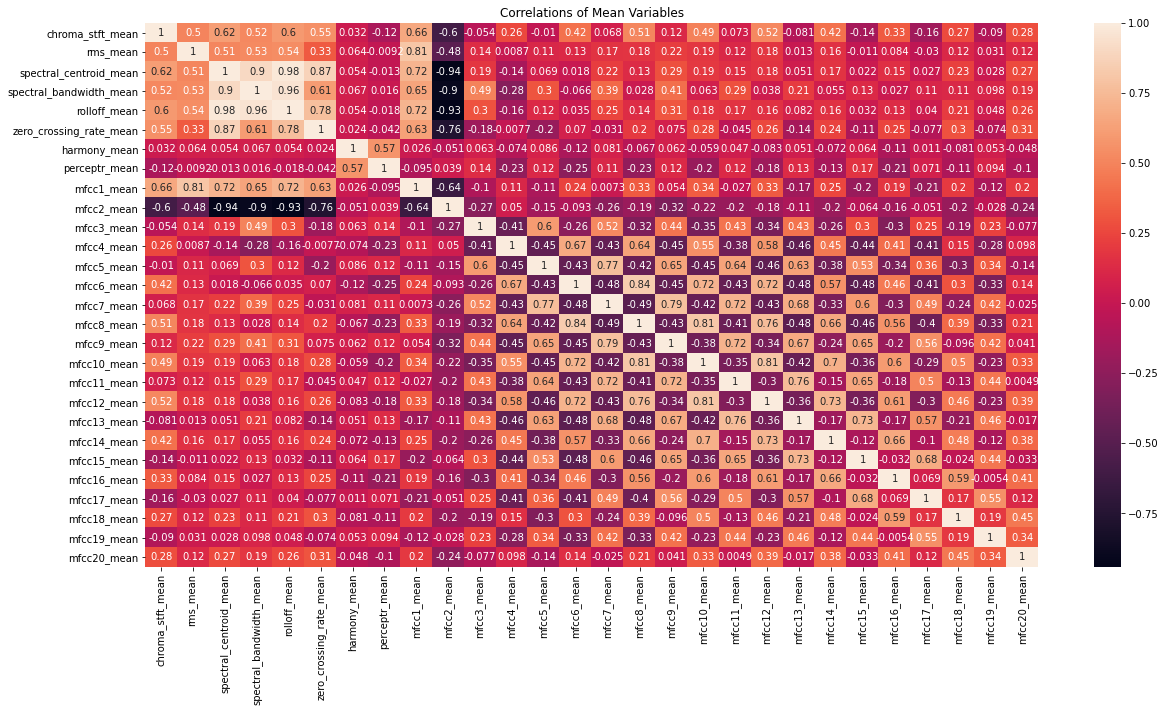

In [15]:
#Let's take a look at the correlation between our Means

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Correlations of Mean Variables")

sns.heatmap(music_df[mean_cols].corr(), annot=True);

From the above heatmap, we can see that `mfcc2_mean` has strong negative correlations with multiple other variables (`spectral_centroid_mean`, `spectral_bandwidth_mean`, `rolloff_mean`). These three variables all have strong positive correlations with each other as well.

I would recommend dropping the columns `mfcc2_mean`, `spectral_centroid_mean`, and `rolloff_mean` in order to remove correlation close that is at or over 0.9 or -0.9.

In [16]:
#Separate the columns with variance from rest of dataframe

var_cols = []

for column in music_df.columns:
    if "var" in column:
        var_cols.append(column)

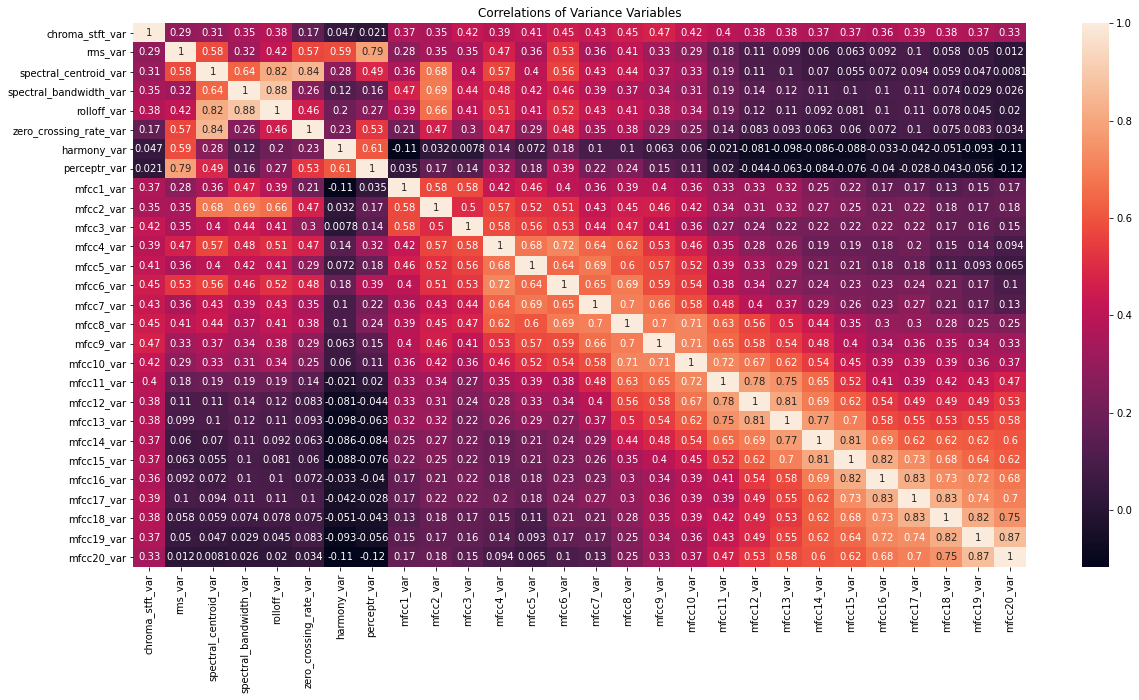

In [17]:
#Let's take a look at the correlation between our Variances

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Correlations of Variance Variables")

sns.heatmap(music_df[var_cols].corr(), annot=True);

Our variance variables seem to be much more independent than the mean varibles with no values at or above 0.9 and -0.9.

## Data Preparation

In [18]:
#LabelEncoder to turn our target classes into numbers
from sklearn.preprocessing import LabelEncoder

#Instantiate our LabelEncoder
lab_enc = LabelEncoder()

#Fit and Transform our target variable and replace the 'label' column in the dataset
music_df['label'] = lab_enc.fit_transform(music_df['label'])

#Check the 'label' column is now encoded
music_df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              2002.449060            85882.761315   3805.839606   
1              2039.036516           213843.755497   3550.522098   
2              1747.702312            76254.192257   3042.260232   
3              1596.412872           166441.494769   2184.745799   
4              1748.172116            88445.209036   3579.757627   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  9.015054e+05                 0.083045                0.000767   
1  2.977893e+06                 0.056040                0.001448   
2  7.840345e+05                 0.076291                0.001007   
3  1.493194e+06                 0.033309                0.000423   
4  1.572978e+06                 0.101461                0.001954   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0 -4.529724e-05     0.008172       0.000008      0.005698  123.046875   
1  1.395807e-04     0.005099      -0.000178      0.003063   67.999589   
2  2.105576e-06     0.016342      -0.000019      0.007458  161.499023   
3  4.583644e-07     0.019054      -0.000014      0.002712   63.024009   
4 -1.756129e-05     0.004814      -0.000010      0.003094  135.999178   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -113.570648  2564.207520  121.571793  295.913818  -19.168142  235.574432   
1 -207.501694  7764.555176  123.991264  560.259949    8.955127  572.810913   
2  -90.722595  3319.044922  140.446304  508.765045  -29.093889  411.781219   
3 -199.544205  5507.517090  150.090897  456.505402    5.662678  257.161163   
4 -160.337708  5195.291992  126.219635  853.784729  -35.587811  333.792938   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   42.366421  151.106873   -6.364664  167.934799   18.623499   89.180840   
1   35.877647  264.506104    2.907320  279.932922   21.510466  156.477097   
2   31.684334  144.090317  -13.984504  155.493759   25.764742   74.548401   
3   26.859079  158.267303    1.771399  268.034393   14.234031  126.794128   
4   22.148071  193.456100  -32.478600  336.276825   10.852294  134.831573   

   mfcc7_mean   mfcc7_var  mfcc8_mean   mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -13.704891   67.660492   15.343150   68.932579  -12.274110   82.204201   
1   -8.560436  200.849182   23.370686  142.555954  -10.099661  166.108521   
2  -13.664875  106.981827   11.639934  106.574875  -11.783643   65.447945   
3   -4.832006  155.912079    9.286494   81.273743   -0.759186   92.114090   
4  -23.352329   93.257095    0.498434  124.672127  -11.793437  130.073349   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.976572   63.386311    -8.326573   61.773094     8.803792   51.244125   
1    11.900497  104.358612    -5.555639  105.173630     5.376327   96.197212   
2     9.718760   67.908859   -13.133803   57.781425     5.791199   64.480209   
3     8.137607   71.314079    -3.200653  110.236687     6.079319   48.251999   
4     1.207256   99.675575   -13.088418   80.254066    -2.813867   86.430626   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  

Our genres were encoded as follows:
`0`: blues
`1`: classical
`2`: country
`3`: disco
`4`: hiphop
`5`: jazz
`6`: metal
`7`: pop
`8`: reggae
`9`: rock

In [19]:
#Define our predictive variables and target variable
X = music_df.drop(['label','filename', 'mfcc2_mean', 'spectral_centroid_mean','rolloff_mean', 'length'], axis=1)
y = music_df['label']

Dropped both non-numeric columns from our X as `label` is our target variable and `filename` is just an id and not intrinsic to the data. Also dropped the columns we idenitfied earlier that had high collinearity.

In [20]:
#Split the data to prevent data leakage using a 80/20 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, 
                                                     y, 
                                                     stratify = y, 
                                                     test_size = 0.2, 
                                                     random_state= 42))

In [21]:
# Let's look to see if our target classes are balanced and our stratify worked
y_train.value_counts()

9    80
8    80
7    80
6    80
5    80
4    80
3    80
2    80
1    80
0    80
Name: label, dtype: int64

## Modeling

If we know that our data contains 10 genres of 100 samples each, then it reasons that our **model-less baseline** accuracy would be 10%; meaning that if we predicted that every song sample was 1 genre, we would be right 10% of the time. That's a pretty low baseline so I'm confident our model will perform better.

In [22]:
#Classification algorithm
from sklearn.linear_model import LogisticRegression

#Pipeline 
from sklearn.pipeline import Pipeline

#Scalers
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Normalizer, MinMaxScaler, RobustScaler,\
PowerTransformer,QuantileTransformer 

from sklearn.metrics import classification_report, plot_confusion_matrix

### Baseline Model: Untuned Logistic Regression with various scalers

For our first model, we are going to use a simple StandardScaler and a Logisitc Regression model. We changed the solver to "liblinear" (which works well for smaller datasets) as we had a convergence error with the default "lbfgs" solver.

#### Baseline Model with Standard Scaler

In [23]:
#Create variable storing our scaler and model
steps = [('stdscale', StandardScaler()), ('LR', LogisticRegression(solver= "liblinear", random_state= 42))]

#Instantiate the Modeling Pipeline
baseline_model = Pipeline(steps)

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('stdscale', StandardScaler()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [24]:
# Let's see our baseline train and test scores
print('StandardScaler Train baseline:', baseline_model.score(X_train, y_train))
print('StandardScaler Test baseline:', baseline_model.score(X_test, y_test))

StandardScaler Train baseline: 0.845
StandardScaler Test baseline: 0.69


It looks like our model is overfit to our training data. This could be caused by high variance and complexity in our data. Let's also try some different scalers.

#### Baseline Model with MinMax Scaler

In [25]:
#Swap out the Scaler
baseline_model.steps[0] = ('minmax', MinMaxScaler())

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [26]:
# Let's see our baseline train and test scores
print('MinMaxScaler Train baseline:', baseline_model.score(X_train, y_train))
print('MinMaxScaler Test baseline:', baseline_model.score(X_test, y_test))

MinMaxScaler Train baseline: 0.74125
MinMaxScaler Test baseline: 0.65


#### Baseline Model with MaxAbsScaler

In [27]:
#Swap out the Scaler
baseline_model.steps[0] = ('maxabs', MaxAbsScaler())

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('maxabs', MaxAbsScaler()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [28]:
# Let's see our baseline train and test scores
print('MaxAbsScaler Train baseline:', baseline_model.score(X_train, y_train))
print('MaxAbsScaler Test baseline:', baseline_model.score(X_test, y_test))

MaxAbsScaler Train baseline: 0.74625
MaxAbsScaler Test baseline: 0.655


#### Baseline Model with Normalizer

In [29]:
#Swap out the Scaler
baseline_model.steps[0] = ('norm', Normalizer())

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('norm', Normalizer()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [30]:
# Let's see our baseline train and test scores
print('Norm Train baseline:', baseline_model.score(X_train, y_train))
print('Norm Test baseline:', baseline_model.score(X_test, y_test))

Norm Train baseline: 0.225
Norm Test baseline: 0.225


#### Baseline Model with RobustScaler

In [31]:
#Swap out the Scaler
baseline_model.steps[0] = ('robust', RobustScaler())

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('robust', RobustScaler()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [32]:
# Let's see our baseline train and test scores
print('RobustScaler Train baseline:', baseline_model.score(X_train, y_train))
print('RobustScaler Test baseline:', baseline_model.score(X_test, y_test))

RobustScaler Train baseline: 0.8425
RobustScaler Test baseline: 0.7


#### Baseline Model with QuantileTransformer 

In [33]:
#Swap out the Scaler
baseline_model.steps[0] = ('quant', QuantileTransformer(n_quantiles= 800, output_distribution='normal'))

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('quant',
                 QuantileTransformer(n_quantiles=800,
                                     output_distribution='normal')),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [34]:
# Let's see our baseline train and test scores
print('QuantileTransformer Train baseline:', baseline_model.score(X_train, y_train))
print('QuantileTransformer Test baseline:', baseline_model.score(X_test, y_test))

QuantileTransformer Train baseline: 0.83625
QuantileTransformer Test baseline: 0.71


#### Baseline Model with Power Transformer

In [35]:
#Swap out the Scaler
baseline_model.steps[0] = ('power', PowerTransformer())

#Fit to our training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('power', PowerTransformer()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [36]:
# Let's see our baseline train and test scores
print('PowerTransformer Train baseline:', baseline_model.score(X_train, y_train))
print('PowerTransformer Test baseline:', baseline_model.score(X_test, y_test))

PowerTransformer Train baseline: 0.85875
PowerTransformer Test baseline: 0.72


PowerTransformer returns the highest accuracy scores on both Train and Test data. However it looks like overfitting will likely be a problem with this data.

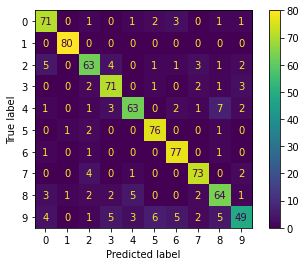

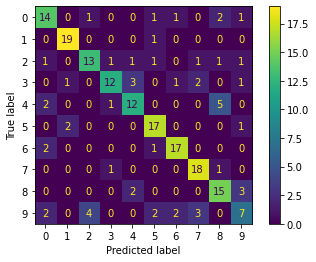

In [37]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(baseline_model, X_train, y_train)
plot_confusion_matrix(baseline_model, X_test, y_test);

In [38]:
print(classification_report(y_test, baseline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.86      0.95      0.90        20
           2       0.72      0.65      0.68        20
           3       0.80      0.60      0.69        20
           4       0.67      0.60      0.63        20
           5       0.74      0.85      0.79        20
           6       0.81      0.85      0.83        20
           7       0.75      0.90      0.82        20
           8       0.62      0.75      0.68        20
           9       0.50      0.35      0.41        20

    accuracy                           0.72       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.71      0.72      0.71       200



It looks like we are having trouble with classifying Genre 9 (rock) in particular.

### Second Model: Tuned Logistic Regression

Now let's perform a Logistic Regression and try to tune our hyper-parameters. We are using PowerTransformer as it gave us the best accuracy scores.

In [39]:
#Crossvalidation packages
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#Create variable storing our scaler and model

steps = [('power', PowerTransformer()), ('LR', LogisticRegression(solver= 'liblinear',
                                                                  random_state= 42))]

# Create list of hyperparameters to try
params = {'LR__penalty':['l1', 'l2'],
         'LR__C': [.01, .1, 1.0, 10, 100, 1000],
         'LR__tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
         'LR__max_iter': np.arange(500, 3000, 250)}


#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 10 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('LR',
                                              LogisticRegression(random_state=42,
                                                                 solver='liblinear'))]),
                   n_jobs=-1,
                   param_distributions={'LR__C': [0.01, 0.1, 1.0, 10, 100,
                                                  1000],
                                        'LR__max_iter': array([ 500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750]),
                                        'LR__penalty': ['l1', 'l2'],
                                        'LR__tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                    0.01, 0.1, 1]},
                   random_state=42)

In [41]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.7025

In [42]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'LR__tol': 0.0001, 'LR__penalty': 'l1', 'LR__max_iter': 1750, 'LR__C': 1.0}

In [43]:
#Save best estimator as our new model
best_lr_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_lr_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 2nd Model:', best_lr_model.score(X_train, y_train))
print('Test 2nd Model:', best_lr_model.score(X_test, y_test))

Train 2nd Model: 0.85375
Test 2nd Model: 0.735


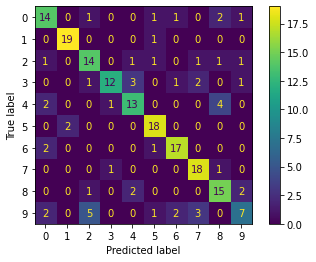

In [44]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(best_lr_model, X_test, y_test);

Compared to our baseline model, our Test Accuracy went up 1.5% and our Train model came down 0.5% (reducing overfitting ever so slightly). Tuning Logistic Regression seemed to work well (except for class 9). 

### Third Model: K-Nearest Neighbor

Now let's try another algorithm, K-Nearest Neighbor (KNN).

In [45]:
#Import K-Nearest Neighbor Classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#Create variable storing our scaler and model
steps = [('power', PowerTransformer()), ('KNN', KNeighborsClassifier())]

# Create list of hyperparameters to try
params = {'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13],
         'KNN__p': [1, 2, 3, 4, 5]}


#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('KNN', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'KNN__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                             13],
                                        'KNN__p': [1, 2, 3, 4, 5]},
                   random_state=42)

In [47]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.6875

In [48]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'KNN__p': 1, 'KNN__n_neighbors': 7}

In [49]:
#Save best estimator as our new model
best_knn_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_knn_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 3rd Model:', best_knn_model.score(X_train, y_train))
print('Test 3rd Model:', best_knn_model.score(X_test, y_test))

Train 3rd Model: 0.785
Test 3rd Model: 0.705


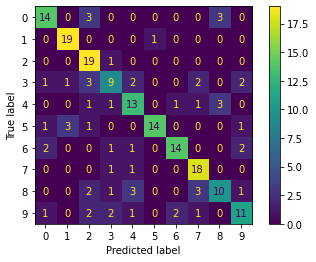

In [50]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(best_knn_model, X_test, y_test);

It looks like our tuned Logistic Regression model did a little better on the test, however we overfit much less. 

### Fourth Model: Decision Trees

Now let's try another algorithm, Decision Trees.

In [51]:
#Import the Decision Trees Classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [52]:
#Create variable storing our scaler and model
steps = [('power', PowerTransformer()), ('DT', DecisionTreeClassifier(random_state=42))]

# Create list of hyperparameters to try
params = {'DT__criterion': ['gini', 'entropy'],
         'DT__min_samples_split': np.arange(1,10,1),
          'DT__min_samples_leaf': np.arange(1,5,1)}



#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('DT',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'DT__criterion': ['gini', 'entropy'],
                                        'DT__min_samples_leaf': array([1, 2, 3, 4]),
                                        'DT__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42)

In [53]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.5312500000000001

In [54]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'DT__min_samples_split': 6,
 'DT__min_samples_leaf': 2,
 'DT__criterion': 'entropy'}

In [55]:
#Save best estimator as our new model
best_dt_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_dt_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 4th Model:', best_dt_model.score(X_train, y_train))
print('Test 4th Model:', best_dt_model.score(X_test, y_test))

Train 4th Model: 0.9025
Test 4th Model: 0.465


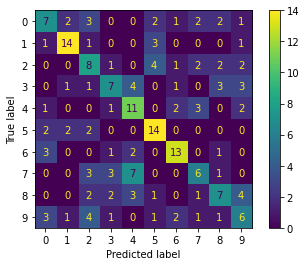

In [56]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(best_dt_model, X_test, y_test);

Our Decision Tree did much worse overall, overfitting Decision Trees are prone to do as well as scoring very low on our test data.

### Fifth Model: Bagged Decision Trees

Let's try to use multiple decision trees with a Bagging Classifier. 

In [57]:
from sklearn.ensemble import BaggingClassifier

In [58]:
#Create Bagging Classifier with 150 Decision Trees
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=42)
                                       , n_estimators = 150)

#Instantiate model
bag_pipe = Pipeline([('power', PowerTransformer()),
                     ('model', bag_class_decision)])

#Create list of hyperparameters to try
params = {'model__base_estimator__criterion': ['gini', 'entropy'],
          'model__base_estimator__min_samples_split': np.arange(1,10,1),
          'model__base_estimator__min_samples_leaf': np.arange(1,5,1),
          'model__base_estimator__max_depth': np.arange(4,28,2)}


# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = bag_pipe, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)


rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('model',
                                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                                n_estimators=150))]),
                   n_jobs=-1,
                   param_distributions={'model__base_estimator__criterion': ['gini',
                                                                             'entropy'],
                                        'model__base_estimator__max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26]),
                                        'model__base_estimator__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__base_estimator__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42)

In [59]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.70125

In [60]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'model__base_estimator__min_samples_split': 9,
 'model__base_estimator__min_samples_leaf': 2,
 'model__base_estimator__max_depth': 12,
 'model__base_estimator__criterion': 'entropy'}

In [61]:
#Save best estimator as our new model
best_bag_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_bag_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 5th Model:', best_bag_model.score(X_train, y_train))
print('Test 5th Model:', best_bag_model.score(X_test, y_test))

Train 5th Model: 0.9975
Test 5th Model: 0.68


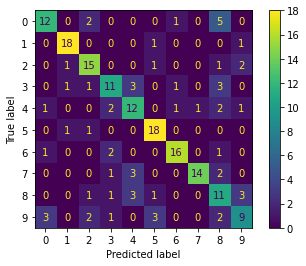

In [62]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(best_bag_model, X_test, y_test);

Well our Bagged Decision Tree model overfit even more, but it did raise our Test accuracy considerably. Logistic Regression and K-Nearest Neighbor both performed better however.

### Sixth Model: XGBoost

Let's try using Extreme Gradient Boost (XGBoost) alogrithm. It often does fairly well using default hyperparameters so we will run both a tuned and untuned model.

In [63]:
from xgboost import XGBClassifier

#### Untuned XGBoost

In [64]:
#Trying out an untuned XGBoost Classifier 
base_xgb_model = Pipeline([('power', PowerTransformer()),
                     ('model', XGBClassifier(random_state=42))])

In [65]:
# Fitting to our training data
base_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('power', PowerTransformer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [66]:
# Let's see our accuracy scores
print('Train untuned XGB Model:', base_xgb_model.score(X_train, y_train))
print('Test untuned XGB Model:', base_xgb_model.score(X_test, y_test))

Train untuned XGB Model: 0.99875
Test untuned XGB Model: 0.715


#### Tuned XGBoost

Let's now try tuning XGBoost.

In [67]:
#Instantiate the XG Boost Pipeline
xgb_pipe = Pipeline([('power', PowerTransformer()),
                     ('model', XGBClassifier(random_state=42))])



#Create list of hyperparameters to try
params = {'model__reg_alpha': np.arange(0,10,1),
          'model__reg_lambda': np.arange(0,10,1),
          'model__subsample': [0,.5,1],
          'model__max_depth': np.arange(1,10,1), 
          'model__learning_rate': [.1, .3, .5],
          'model__gamma': np.arange(0, 100, 10), 
          'model__n_estimators': np.arange(0, 500, 50)} 


# 5 Fold Randomized Cross Validations with XGBoost Classifier
rand_cv = RandomizedSearchCV(estimator = xgb_pipe, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)


rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                           

In [68]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.58375

In [69]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'model__subsample': 0.5,
 'model__reg_lambda': 5,
 'model__reg_alpha': 9,
 'model__n_estimators': 100,
 'model__max_depth': 1,
 'model__learning_rate': 0.5,
 'model__gamma': 0}

In [70]:
#Save best estimator as our new model
best_xgb_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_xgb_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 6th Model:', best_xgb_model.score(X_train, y_train))
print('Test 6th Model:', best_xgb_model.score(X_test, y_test))

Train 6th Model: 0.71875
Test 6th Model: 0.58


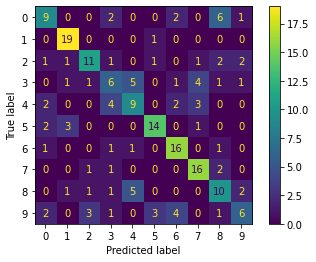

In [71]:
# Let's look at our Tuned XGBoost Predictions in a confusion matrix
plot_confusion_matrix(best_xgb_model, X_test, y_test);

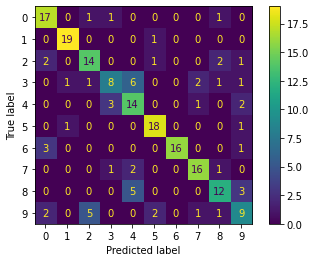

In [72]:
# Let's now compare the above matrix to our Untuned XGBoost Predictions
plot_confusion_matrix(base_xgb_model, X_test, y_test);

Our Untuned XGBoost model (71.5% Test Accuracy) outperformed our Tuned XGBoost model considerably (58% Test Accuracy). 

### Seventh Model

Let's try to use multiple decision trees again but with a Random Forest Classifier.

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
#Instantiate model with Random Forest Classifier
rf_pipe = Pipeline([('power', PowerTransformer()),
                    ('model', RandomForestClassifier(random_state=42))])

#Create list of hyperparameters to try
params = {'model__criterion': ['gini', 'entropy'],
          'model__n_estimators': np.arange(50, 500, 50),
          'model__min_samples_split': np.arange(1,10,1),
          'model__min_samples_leaf': np.arange(1,5,1),
          'model__max_depth': np.arange(5,15,1)}

#           'model__n_estimators': [50, 100, 150, 200, 250],
#         'model__max_depth': np.arange(4,28,2)}

# 10 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = rf_pipe, 
                             param_distributions = params,
                             cv = 10, 
                             n_jobs= -1, 
                             random_state=42)


rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('power', PowerTransformer()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'model__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42)

In [75]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.7075

In [76]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'model__n_estimators': 100,
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 2,
 'model__max_depth': 14,
 'model__criterion': 'entropy'}

In [77]:
#Save best estimator as our new model
best_rf_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_rf_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 7th Model:', best_rf_model.score(X_train, y_train))
print('Test 7th Model:', best_rf_model.score(X_test, y_test))

Train 7th Model: 0.99875
Test 7th Model: 0.72


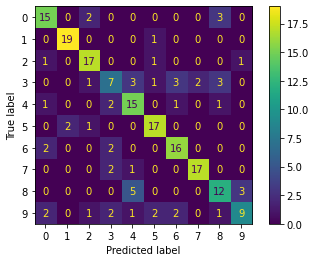

In [78]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(best_rf_model, X_test, y_test);

Random Forest seems to deliver our second best Test Accuracy Score yet (72%) and predicts just a little better than both our KNN and Untuned XGBoost models.

### Eighth Model

Let's see about stacking multiple algorithms together; Logistic Regression (0.735), RandomForest (0.72), and Untuned XGBoost (0.715) did best on test data so let's use those three.

In [79]:
from sklearn.ensemble import StackingClassifier

In [80]:
#Setting up our estimators stack with our tuned models
estimators = [('LR', best_lr_model),
              ('RF', best_rf_model),
              ('XGB', base_xgb_model)]

sr = StackingClassifier(estimators)

In [81]:
stacked_model = Pipeline([('model', sr)])
stacked_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 StackingClassifier(estimators=[('LR',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('LR',
                                                                  LogisticRegression(max_iter=1750,
                                                                                     penalty='l1',
                                                                                     random_state=42,
                                                                                     solver='liblinear'))])),
                                                ('RF',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                         

In [82]:
# Let's see our scores
print('Train 8th Model:', stacked_model.score(X_train, y_train))
print('Test 8th Model:', stacked_model.score(X_test, y_test))

Train 8th Model: 0.99875
Test 8th Model: 0.78


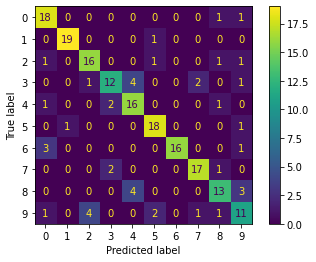

In [83]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(stacked_model, X_test, y_test);

Stacking models gave us our best Test Accuracy score so far at 78%, but overfitting (our train accuracy) is still at 99%.

### Ninth Model

What if we continued stacking multiple algorithms together, but switched out our Untuned XGBoost (0.715) for K-Nearest Neightbor (0.705) since Random Forest and XGBoost both are tree-based models.

In [84]:
#Setting up our estimators stack with our tuned models
estimators = [('LR', best_lr_model),
              ('RF', best_rf_model),
              ('KNN', best_knn_model)]

sr = StackingClassifier(estimators)

In [85]:
second_stacked_model = Pipeline([('model', sr)])
second_stacked_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 StackingClassifier(estimators=[('LR',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('LR',
                                                                  LogisticRegression(max_iter=1750,
                                                                                     penalty='l1',
                                                                                     random_state=42,
                                                                                     solver='liblinear'))])),
                                                ('RF',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                         

In [86]:
# Let's see our scores
print('Train 9th Model:', second_stacked_model.score(X_train, y_train))
print('Test 9th Model:', second_stacked_model.score(X_test, y_test))

Train 9th Model: 0.9425
Test 9th Model: 0.805


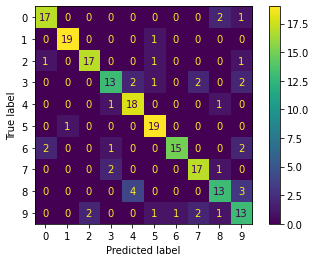

In [87]:
# Let's look at our predictions in a confusion matrix
plot_confusion_matrix(second_stacked_model, X_test, y_test);

Switching in KNN for XGBoost brought down our overfitting and improved our Test accuracy by 2.5%.

### Tenth Model

Let's try to use Quadratic Discriminant Analysis which could help with collinearity.

In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [89]:
#Instantiate model with QuadraticDiscriminantAnalysis
steps = [('power', PowerTransformer()), ('QDA', QuadraticDiscriminantAnalysis())]

qda_model = Pipeline(steps)

#Fit qda model to training data
qda_model .fit(X_train, y_train)

Pipeline(steps=[('power', PowerTransformer()),
                ('QDA', QuadraticDiscriminantAnalysis())])

In [90]:
# Let's see our scores
print('Train 10th Model:', qda_model.score(X_train, y_train))
print('Test 10th Model:', qda_model.score(X_test, y_test))

Train 10th Model: 0.99875
Test 10th Model: 0.63


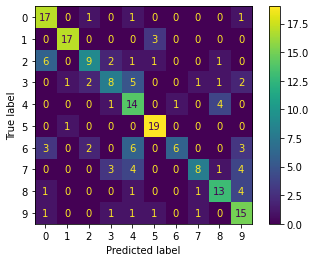

In [91]:
plot_confusion_matrix(qda_model, X_test, y_test);

QDA performed pretty poorly overall but did seem to do decently with correctly classifying Class 9 which other models have struggled with. 

### Eleventh Model

Let's add in our QDA model and our Tuned XGBoost model to our stack. Using our Tuned XGBoost to hopefully help with overfitting.

In [92]:
#Setting up our estimators stack with our tuned models
estimators = [('QDA', qda_model),
              ('LR', best_lr_model),
              ('KNN', best_knn_model),
              ('RF', best_rf_model),
              ('XGB', best_xgb_model)]

sr = StackingClassifier(estimators)

In [93]:
third_stacked_model = Pipeline([('model', sr)])
third_stacked_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 StackingClassifier(estimators=[('QDA',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('QDA',
                                                                  QuadraticDiscriminantAnalysis())])),
                                                ('LR',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('LR',
                                                                  LogisticRegression(max_iter=1750,
                                                                                     penalty='l1',
                                                                                     random_

In [94]:
# Let's see our scores
print('Train 11th Model:', third_stacked_model.score(X_train, y_train))
print('Test 11th Model:', third_stacked_model.score(X_test, y_test))

Train 11th Model: 0.9675
Test 11th Model: 0.82


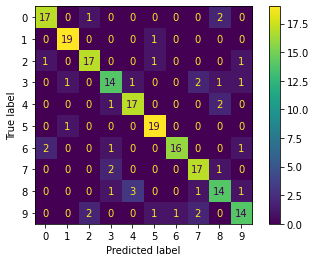

In [95]:
plot_confusion_matrix(third_stacked_model, X_test, y_test);

In [96]:
# Let's look at our accuracy, precision, and recall for each of our 10 genres/classes
print(classification_report(y_test, third_stacked_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.90      0.95      0.93        20
           2       0.85      0.85      0.85        20
           3       0.74      0.70      0.72        20
           4       0.81      0.85      0.83        20
           5       0.86      0.95      0.90        20
           6       0.94      0.80      0.86        20
           7       0.77      0.85      0.81        20
           8       0.70      0.70      0.70        20
           9       0.78      0.70      0.74        20

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Well this seems to be our best test score accuracy yet at 82% with precision and recall all over 70% as well.

### Twelfth Model: using SMOTE to increase the size of our train data

Maybe if we provide more train data for our model, it will perform better on the test.

In [97]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = {0: 120, 1:120, 2:120, 3:120, 4:120, 5:120, 6:120, 7:120, 8:120, 9:120},
              random_state = 42)

X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [98]:
y_oversample.value_counts()

9    120
8    120
7    120
6    120
5    120
4    120
3    120
2    120
1    120
0    120
Name: label, dtype: int64

In [99]:
#Setting up our best estimators stack with our tuned models
estimators = [('QDA', qda_model),
              ('LR', best_lr_model),
              ('KNN', best_knn_model),
              ('RF', best_rf_model),
              ('XGB', best_xgb_model)]

sr = StackingClassifier(estimators)

In [100]:
smote_stacked_model = Pipeline([('model', sr)])
smote_stacked_model.fit(X_oversample, y_oversample)

Pipeline(steps=[('model',
                 StackingClassifier(estimators=[('QDA',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('QDA',
                                                                  QuadraticDiscriminantAnalysis())])),
                                                ('LR',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('LR',
                                                                  LogisticRegression(max_iter=1750,
                                                                                     penalty='l1',
                                                                                     random_

In [101]:
# Let's see our scores
print('Smote Train Model:', smote_stacked_model.score(X_train, y_train))
print('Smote Test Model:', smote_stacked_model.score(X_test, y_test))

Smote Train Model: 0.9975
Smote Test Model: 0.8


In [102]:
# Let's look at our accuracy, precision, and recall for each of our 10 genres/classes
print(classification_report(y_test, smote_stacked_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.95      0.95      0.95        20
           2       0.80      0.80      0.80        20
           3       0.71      0.60      0.65        20
           4       0.77      0.85      0.81        20
           5       0.90      0.95      0.93        20
           6       1.00      0.70      0.82        20
           7       0.76      0.80      0.78        20
           8       0.75      0.75      0.75        20
           9       0.65      0.75      0.70        20

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



Well it looks like that just increased overfitting and lowered our test accuracy.

### Thirteenth Model: Feature Importances

Let's look at Feature Importances from our Untuned XGBoost model in order to know which predictive variables may be best to use.

In [103]:
#XGBoost Feature Importances
xgb_feat_imp = base_xgb_model['model'].feature_importances_

xgb_feat_imp_series = pd.Series(xgb_feat_imp, index = X.columns).sort_values(ascending = False)

In [104]:
#View our series of ranked predictive variables
xgb_feat_imp_series

perceptr_var               0.073461
spectral_bandwidth_mean    0.073250
chroma_stft_var            0.069152
mfcc12_mean                0.038126
chroma_stft_mean           0.032874
mfcc5_var                  0.030772
mfcc7_var                  0.028408
harmony_mean               0.027822
mfcc1_var                  0.023170
mfcc9_mean                 0.022940
rms_var                    0.022201
mfcc10_var                 0.019243
harmony_var                0.018984
mfcc4_var                  0.018863
rolloff_var                0.018498
rms_mean                   0.018389
mfcc4_mean                 0.018283
mfcc11_mean                0.018268
mfcc8_mean                 0.016875
mfcc8_var                  0.016675
mfcc13_mean                0.016254
spectral_centroid_var      0.016123
mfcc1_mean                 0.015551
mfcc12_var                 0.015378
mfcc5_mean                 0.015311
mfcc6_var                  0.015108
mfcc13_var                 0.015099
mfcc15_mean                0

In [105]:
#Assign top 20 predictive features to a new variable
xgb_feat_imp_cols = xgb_feat_imp_series.index[0:20]

In [106]:
#Define new X variables using Feature Importances columns
xgb_feat_X_train = X_train[xgb_feat_imp_cols]
xgb_feat_X_test = X_test[xgb_feat_imp_cols]

In [107]:
#Setting up our estimators stack with our tuned models
estimators = [('QDA', qda_model),
              ('LR', best_lr_model),
              ('KNN', best_knn_model),
              ('RF', best_rf_model),
              ('XGB', best_xgb_model)]

sr = StackingClassifier(estimators)

In [108]:
#Stacked model with XGBoost Feature Importances
xgb_feat_stacked_model = Pipeline([('model', sr)])
xgb_feat_stacked_model.fit(xgb_feat_X_train, y_train)

Pipeline(steps=[('model',
                 StackingClassifier(estimators=[('QDA',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('QDA',
                                                                  QuadraticDiscriminantAnalysis())])),
                                                ('LR',
                                                 Pipeline(steps=[('power',
                                                                  PowerTransformer()),
                                                                 ('LR',
                                                                  LogisticRegression(max_iter=1750,
                                                                                     penalty='l1',
                                                                                     random_

In [109]:
# Let's see our scores
print('Untuned XGB Feat Imp Train Model:', xgb_feat_stacked_model.score(xgb_feat_X_train, y_train))
print('Untuned XGB Feat Imp Test Model:', xgb_feat_stacked_model.score(xgb_feat_X_test, y_test))

Untuned XGB Feat Imp Train Model: 0.92875
Untuned XGB Feat Imp Test Model: 0.77


Doesn't score as accurately as our stacked models without feature importances.

### Fourteenth Model: Untuned Stack

For curiousity's sake, let's see how well an untuned stack performs compared to our best tuned model.

In [110]:
#Setting up our estimators stack with our untuned models
estimators = [('XGB', XGBClassifier(random_state=42)), 
              ('LR', LogisticRegression(solver="liblinear", random_state=42)),
              ('QDA', QuadraticDiscriminantAnalysis())]

untuned_sr = StackingClassifier(estimators)

In [111]:
untuned_stacked_model = Pipeline([('power', PowerTransformer()), ('model', untuned_sr)])
untuned_stacked_model.fit(X_train, y_train)

Pipeline(steps=[('power', PowerTransformer()),
                ('model',
                 StackingClassifier(estimators=[('XGB',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               importance_type='gain',
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                         

In [112]:
# Let's see our scores
print('Untuned Stack Train Model:', untuned_stacked_model.score(X_train, y_train))
print('Untuned Stack Test Model:', untuned_stacked_model.score(X_test, y_test))

Untuned Stack Train Model: 0.99875
Untuned Stack Test Model: 0.785


Our Untuned Stack performed about as well (acutally 0.5% better on the test) than our Eigth Model which was our first Tuned Stack model.

### Final Model

Our best model seemd to be our 11th Model that was a tuned stack of 5 different alogorithms (Logistic Regression, Quadratic Discriminant Analysis, K-Nearest Neighbor, Random Forest, and XG Boost).
<br>
<br>
Although it still overfit on the training data (**96.75%** accuracy score), our test accuracy score was the highest we've seen at **82%**.

## Evaluation

In [113]:
#Import evaluation metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

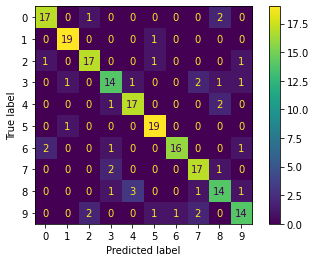

In [114]:
#Final model evaluation 
plot_confusion_matrix(third_stacked_model, X_test, y_test);

In [115]:
# Prediction on Test Data
y_pred = third_stacked_model.predict(X_test)

In [116]:
#Let's look at our metrics for our final model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.90      0.95      0.93        20
           2       0.85      0.85      0.85        20
           3       0.74      0.70      0.72        20
           4       0.81      0.85      0.83        20
           5       0.86      0.95      0.90        20
           6       0.94      0.80      0.86        20
           7       0.77      0.85      0.81        20
           8       0.70      0.70      0.70        20
           9       0.78      0.70      0.74        20

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Explanation of results

### Conclusion

What did we learn from this project. How do we hope to implement this for our business case